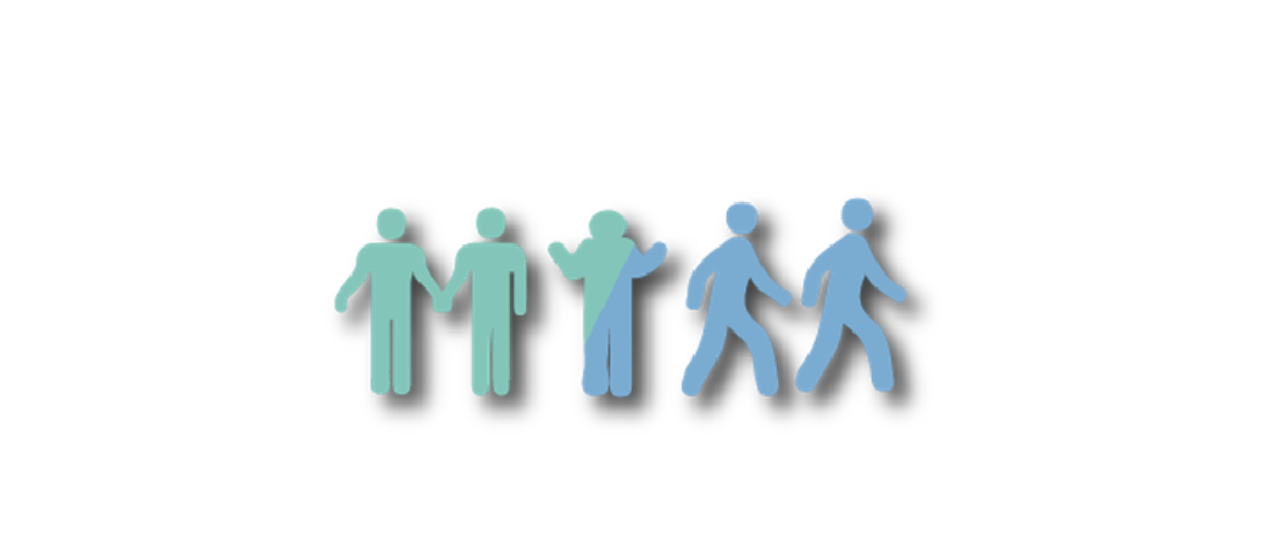

# Introduction 

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

# Loading the necessary library 

In [1]:
import numpy as np
import pandas as pd
import missingno as mn
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline
import warnings

import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore')


# Understanding the data

In [2]:
df= pd.read_csv('train.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


customerID: A unique identifier for each customer.

gender: The gender of the customer.

SeniorCitizen: Whether the customer is a senior citizen or not.

Partner: Whether the customer has a partner or not.

Dependents: Whether the customer has any dependents (e.g. children) or not.

tenure: The length of time (in months) that the customer has been with the company.

PhoneService: Whether the customer has phone service or not.
MultipleLines: Whether the customer has multiple phone lines or not.

InternetService: The type of internet service the customer has.

OnlineSecurity: Whether the customer has online security or not.

OnlineBackup: Whether the customer has online backup or not.

DeviceProtection: Whether the customer has device protection or not.

TechSupport: Whether the customer has tech support or not.

StreamingTV: Whether the customer has streaming TV service or not.

StreamingMovies: Whether the customer has streaming movie service or not.

Contract: The type of contract the customer has with the company.
PaperlessBilling: Whether the customer has paperless billing or not.

PaymentMethod: The customer's payment method.

MonthlyCharges: The amount the customer is charged per month.

TotalCharges: The total amount the customer has been charged since joining the company.

Churn: Whether the customer has churned (i.e. stopped using the company's services) or not.

In [3]:
df.shape

(7043, 21)

In [4]:
#provides information about the dataframe such as the number of non-null values, the data type of each column, and the memory usage of the dataframe. 
#It is useful for getting a quick overview of the data and checking for missing values.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#provides summary statistics for numerical columns in the dataframe,
#it includes the count, mean, standard deviation, minimum and maximum values, and quartiles.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The target variable would be Churn. Because it decides whether the customer has churned (i.e. stopped using the company's services) or not.

In [7]:
missing=df.isnull().sum()
missing

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Searching the Missing Values

<AxesSubplot:>

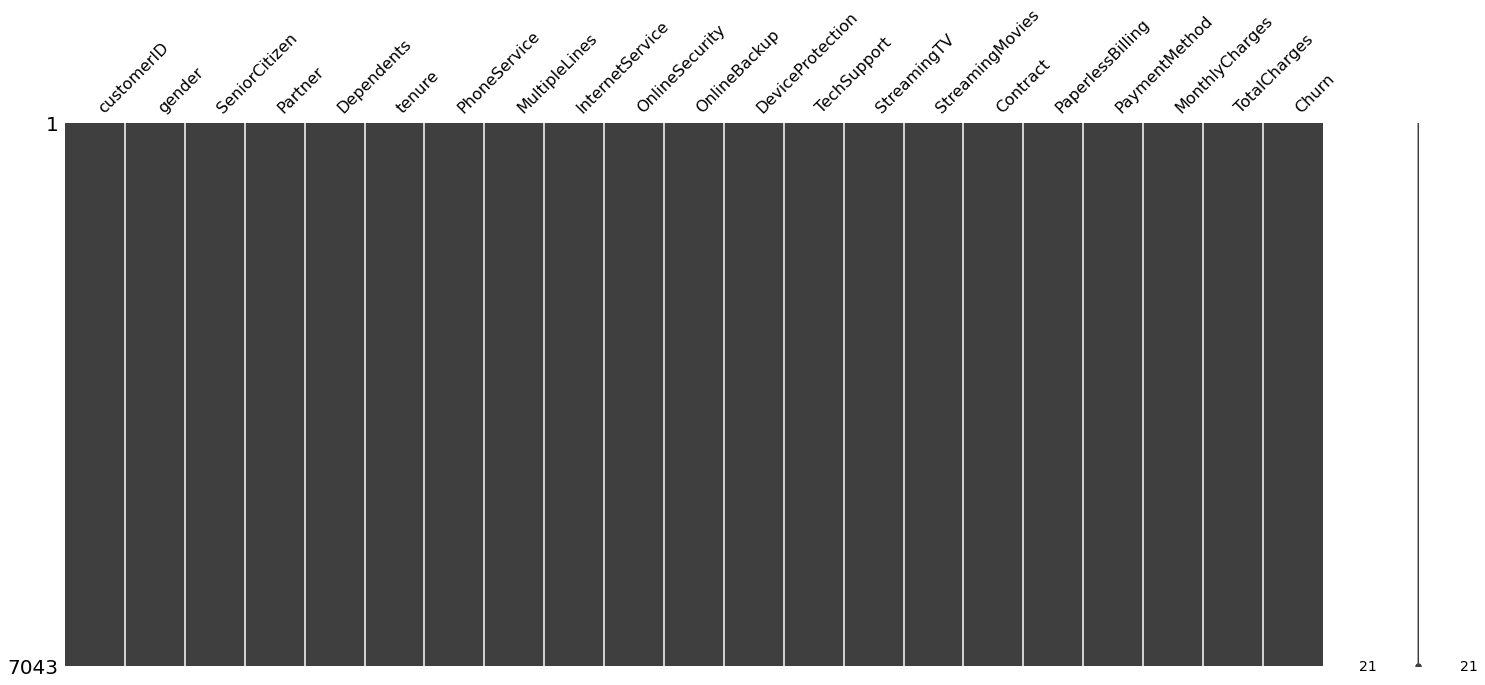

In [9]:
mn.matrix(df)

Using this matrix we can very quickly find the missing values in the dataset.

From the above visualisation we can see that there is no missing data.

In [10]:
def Missing_Values(df): #This function, called Missing_Values, takes in a Pandas DataFrame df as input.
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    #empty lists are created to store the results.
    
    for col in df.columns:
        variable_name.append(col)
        data_type.append(df[col].dtype)
        total_value.append(df[col].shape[0])
        total_missing_value.append(df[col].isnull().sum())
        missing_value_rate.append(round(df[col].isnull().sum()/df[col].shape[0],4))
        unique_value_list.append(df[col].unique())
        total_unique_value.append(len(df[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [11]:
data_info = Missing_Values(df)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
customerID,7043,0,0.0,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043
DeviceProtection,7043,0,0.0,object,"[No, Yes, No internet service]",3
TotalCharges,7043,0,0.0,object,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5...",6531
MonthlyCharges,7043,0,0.0,float64,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...",1585
PaymentMethod,7043,0,0.0,object,"[Electronic check, Mailed check, Bank transfer...",4
PaperlessBilling,7043,0,0.0,object,"[Yes, No]",2
Contract,7043,0,0.0,object,"[Month-to-month, One year, Two year]",3
StreamingMovies,7043,0,0.0,object,"[No, Yes, No internet service]",3
StreamingTV,7043,0,0.0,object,"[No, Yes, No internet service]",3


# Visualization

In [12]:
countplot_columns = ['DeviceProtection','PaymentMethod','PaperlessBilling','StreamingMovies','StreamingTV','TechSupport','OnlineBackup','gender','OnlineSecurity','InternetService','MultipleLines','PhoneService','Dependents','Partner','SeniorCitizen']





In [13]:
list(enumerate(countplot_columns))

[(0, 'DeviceProtection'),
 (1, 'PaymentMethod'),
 (2, 'PaperlessBilling'),
 (3, 'StreamingMovies'),
 (4, 'StreamingTV'),
 (5, 'TechSupport'),
 (6, 'OnlineBackup'),
 (7, 'gender'),
 (8, 'OnlineSecurity'),
 (9, 'InternetService'),
 (10, 'MultipleLines'),
 (11, 'PhoneService'),
 (12, 'Dependents'),
 (13, 'Partner'),
 (14, 'SeniorCitizen')]

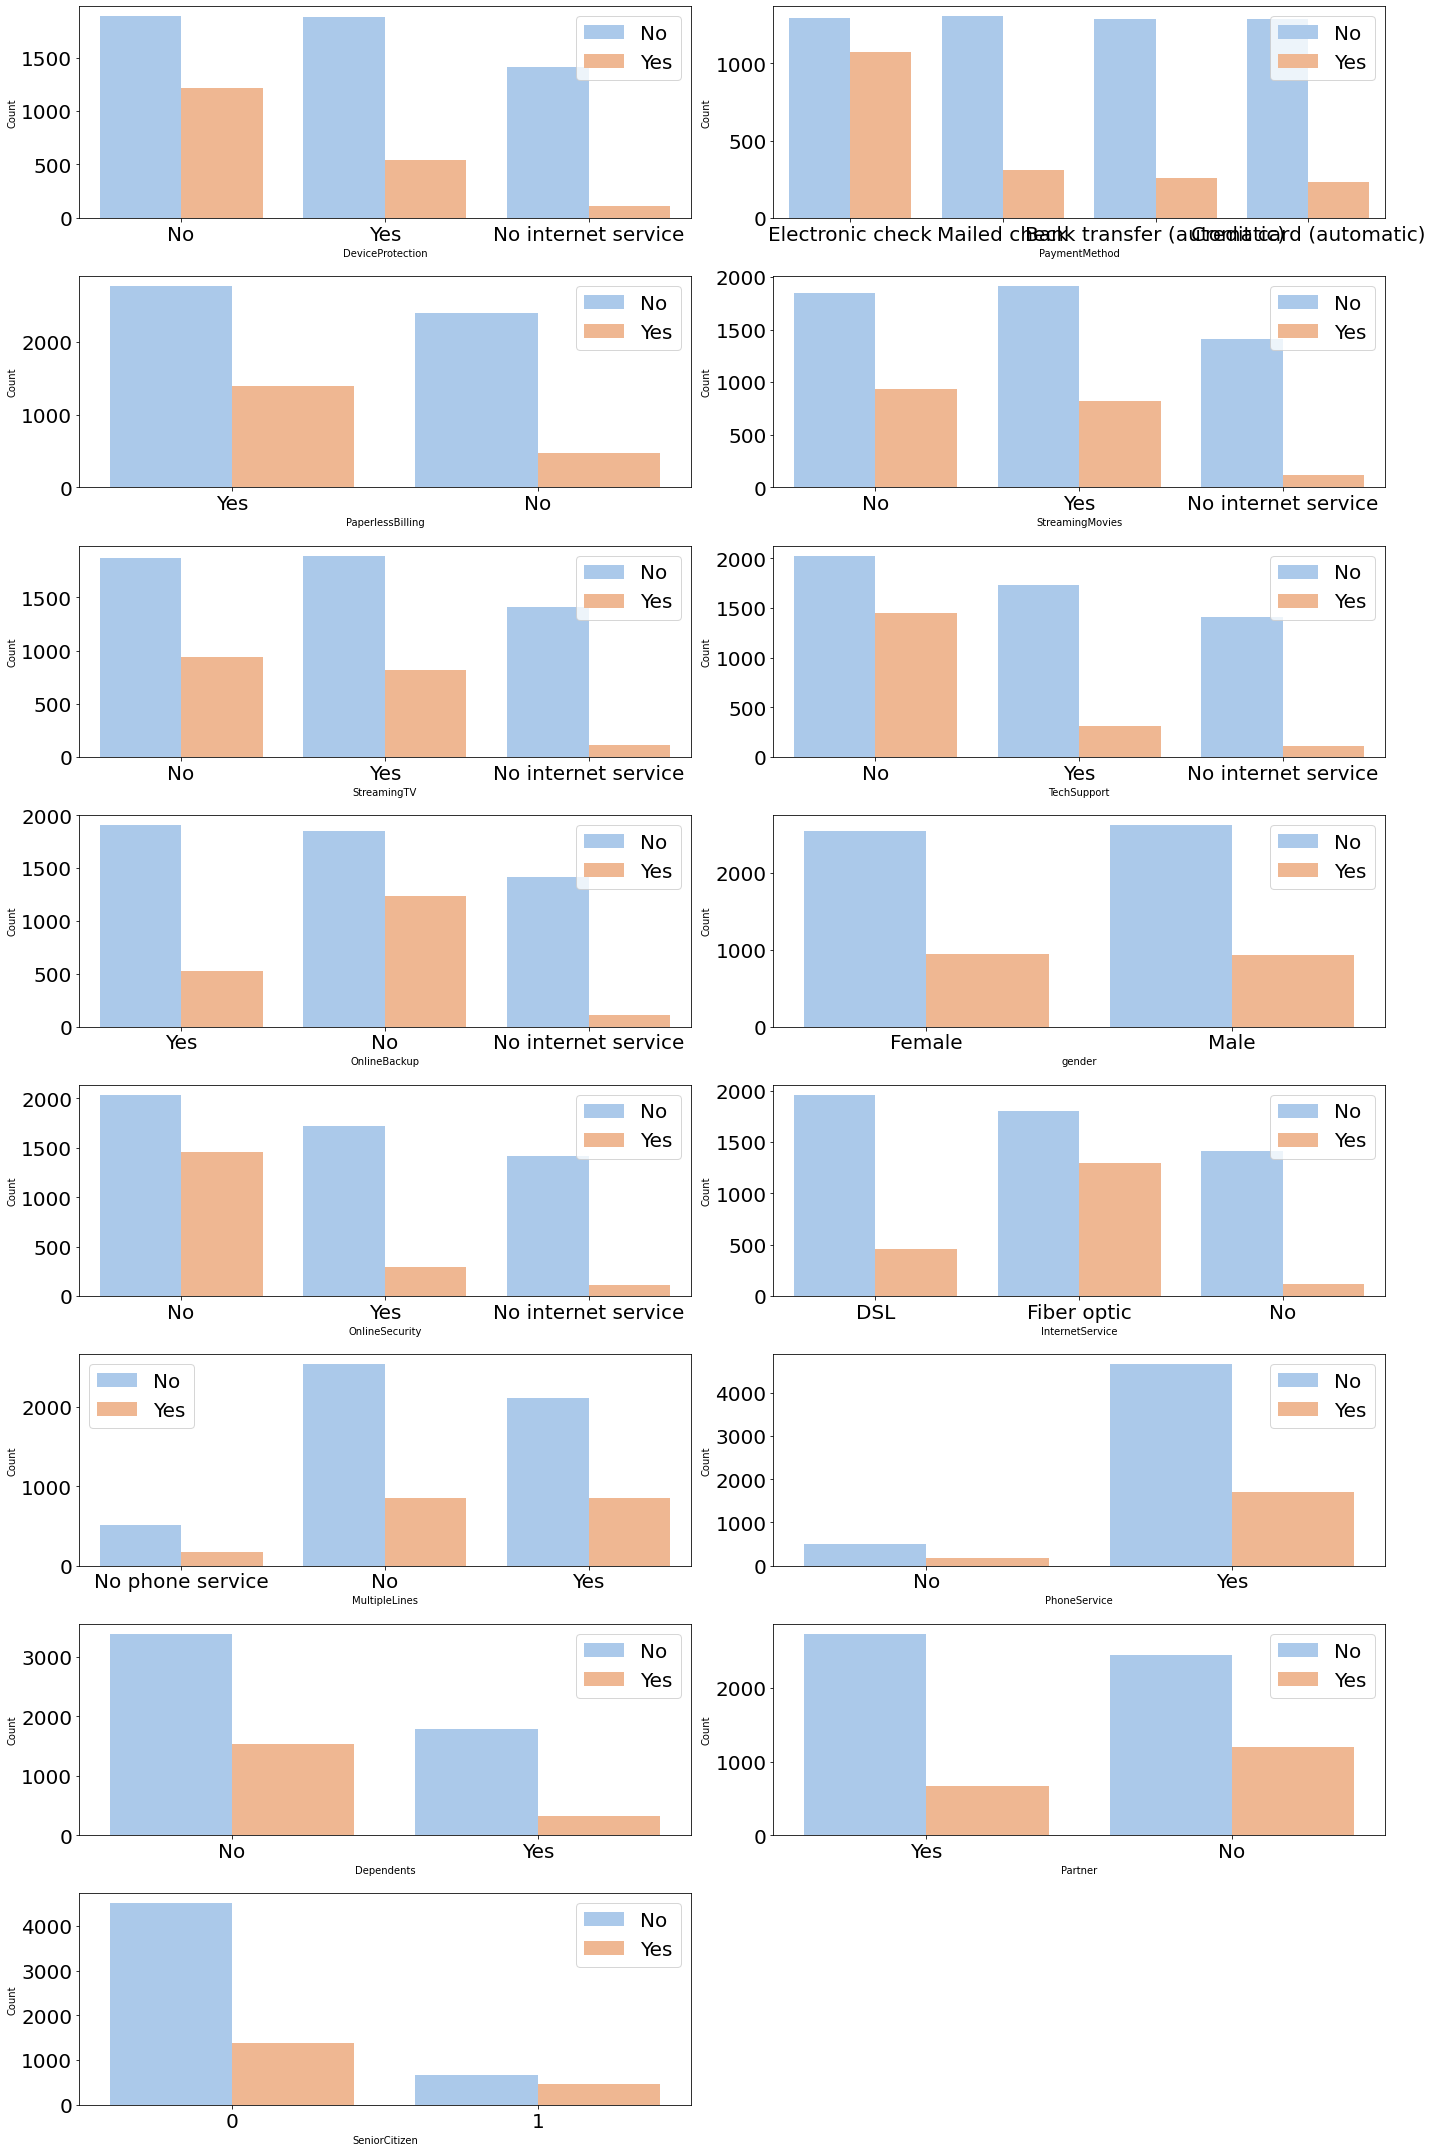

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[20, 30])
for i, col in enumerate(countplot_columns):
    plt.subplot(8, 2, i+1)
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='pastel')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(labelsize=20)
    ax.legend(fontsize=20)
    plt.tight_layout()


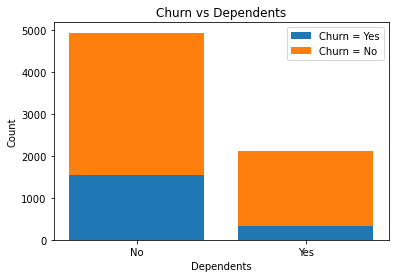

In [15]:
# Create a subset of the data containing only the "Churn" and "Dependents" variables
subset = df[["Churn", "Dependents"]]

# Create a pivot table to count the number of observations for each combination of "Churn" and "Dependents"
pivot_table = pd.pivot_table(data=subset, values="Churn", index="Dependents", columns="Churn", aggfunc=len)

# Create the histogram
fig, ax = plt.subplots()
ax.bar(pivot_table.index, pivot_table["Yes"], label="Churn = Yes")
ax.bar(pivot_table.index, pivot_table["No"], bottom=pivot_table["Yes"], label="Churn = No")
ax.set_xlabel("Dependents")
ax.set_ylabel("Count")
ax.set_title("Churn vs Dependents")
ax.legend()
plt.show()



Customers without dependents are more likely to churn

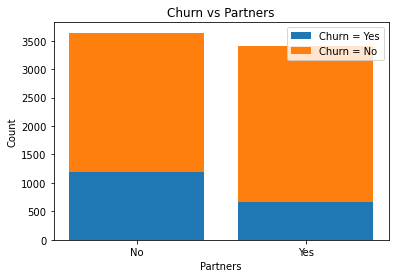

In [16]:
# Create a subset of the data containing only the "Churn" and "Partner" variables
subset = df[["Churn", "Partner"]]

# Create a pivot table to count the number of observations for each combination of "Churn" and "Dependents"
pivot_table = pd.pivot_table(data=subset, values="Churn", index="Partner", columns="Churn", aggfunc=len)

# Create the histogram
fig, ax = plt.subplots()
ax.bar(pivot_table.index, pivot_table["Yes"], label="Churn = Yes")
ax.bar(pivot_table.index, pivot_table["No"], bottom=pivot_table["Yes"], label="Churn = No")
ax.set_xlabel("Partners")
ax.set_ylabel("Count")
ax.set_title("Churn vs Partners")
ax.legend()
plt.show()


Customers that doesn't have partners are more likely to churn

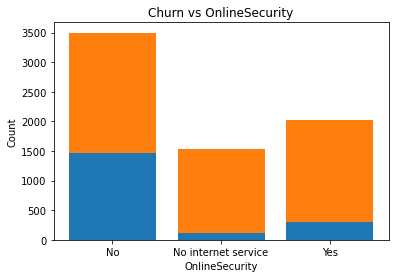

In [17]:
# Create a subset of the data containing only the "Churn" and "OnlineSecurity" variables
subset = df[["Churn", "OnlineSecurity"]]

# Create a pivot table to count the number of observations for each combination of "Churn" and "Dependents"
pivot_table = pd.pivot_table(data=subset, values="Churn", index="OnlineSecurity", columns="Churn", aggfunc=len)

# Create the histogram
fig, ax = plt.subplots()
ax.bar(pivot_table.index, pivot_table["Yes"], label="Churn = Yes")
ax.bar(pivot_table.index, pivot_table["No"], bottom=pivot_table["Yes"], label="Churn = No")
ax.set_xlabel("OnlineSecurity")
ax.set_ylabel("Count")
ax.set_title("Churn vs OnlineSecurity")
plt.show()

Most customers churn in the absence of online security,

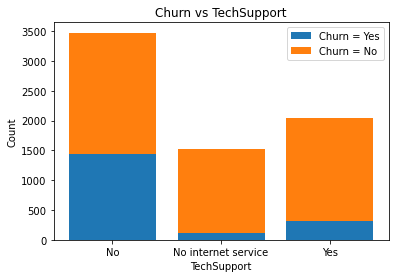

In [18]:
# Create a subset of the data containing only the "Churn" and "TechSupport" variables
subset = df[["Churn", "TechSupport"]]

# Create a pivot table to count the number of observations for each combination of "Churn" and "Dependents"
pivot_table = pd.pivot_table(data=subset, values="Churn", index="TechSupport", columns="Churn", aggfunc=len)

# Create the histogram
fig, ax = plt.subplots()
ax.bar(pivot_table.index, pivot_table["Yes"], label="Churn = Yes")
ax.bar(pivot_table.index, pivot_table["No"], bottom=pivot_table["Yes"], label="Churn = No")
ax.set_xlabel("TechSupport")
ax.set_ylabel("Count")
ax.set_title("Churn vs TechSupport")
ax.legend()
plt.show()


Customers with no TechSupport are most likely to migrate to another service provider.

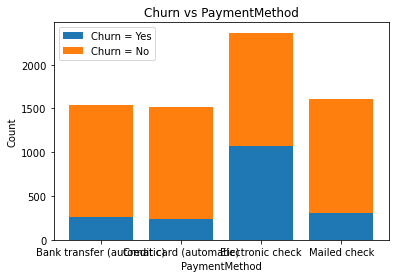

In [19]:
# Create a subset of the data containing only the "Churn" and "PaymentMethod" variables
subset = df[["Churn", "PaymentMethod"]]

# Create a pivot table to count the number of observations for each combination of "Churn" and "Dependents"
pivot_table = pd.pivot_table(data=subset, values="Churn", index="PaymentMethod", columns="Churn", aggfunc=len)

# Create the histogram
fig, ax = plt.subplots()
ax.bar(pivot_table.index, pivot_table["Yes"], label="Churn = Yes")
ax.bar(pivot_table.index, pivot_table["No"], bottom=pivot_table["Yes"], label="Churn = No")
ax.set_xlabel("PaymentMethod")
ax.set_ylabel("Count")
ax.set_title("Churn vs PaymentMethod")
ax.legend()
plt.show()
plt.show()

* In the case of Electronic check, churn is very high.
* People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

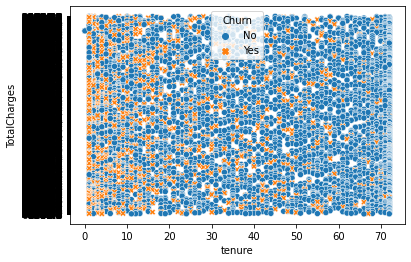

In [20]:
sns.scatterplot(data=df,x="tenure",y="TotalCharges",hue="Churn",style="Churn")


Most of the customers leaves due to less tenure and high monthly charges

In [21]:
target=df.iloc[:,-1]

In [22]:
target

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [23]:
target.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

there is an imbalance in the churn variable as the number of customers who have churned is significantly lower than the number of customers who have not churned

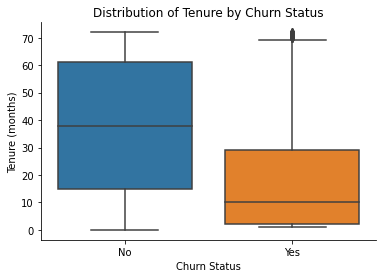

In [24]:

# Create a box plot of tenure by churn status
sns.boxplot(x="Churn", y="tenure", data=df)
sns.despine()
plt.xlabel("Churn Status")
plt.ylabel("Tenure (months)")
plt.title("Distribution of Tenure by Churn Status")
plt.show()

The median value for the "Yes" category is lower than that of the "No" category,it suggests that customers with lower "tenure" are more likely to churn.

New customers are more likely to churn

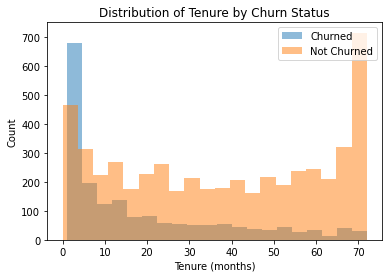

In [25]:
# Create a new DataFrame with only the "tenure" and "churn" columns
tenure_churn = df[["tenure", "Churn"]]

# Split the data into two groups based on churn status
churned = tenure_churn[tenure_churn["Churn"] == "Yes"]
not_churned = tenure_churn[tenure_churn["Churn"] == "No"]

# Plot the histograms for each group
plt.hist(churned["tenure"], bins=20, alpha=0.5, label="Churned")
plt.hist(not_churned["tenure"], bins=20, alpha=0.5, label="Not Churned")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.title("Distribution of Tenure by Churn Status")
plt.legend(loc="upper right")
plt.show()

We can clearly see that customers with a subscription for a month have highly churned 

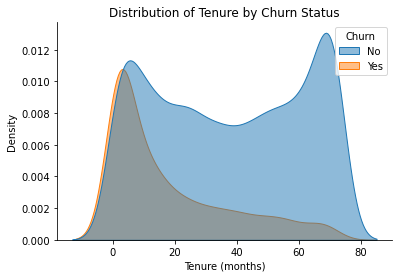

In [26]:
# Create a density plot of tenure by churn status
sns.kdeplot(x="tenure", hue="Churn", data=df, fill=True, alpha=0.5)
sns.despine()
plt.xlabel("Tenure (months)")
plt.ylabel("Density")
plt.title("Distribution of Tenure by Churn Status")
plt.show()

In [27]:
value_counts = df['DeviceProtection'].value_counts()
value_counts 


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

'No internet service' indicates that the customer does not have an internet service subscription, and therefore the option to subscribe to a device protection service is not available. 

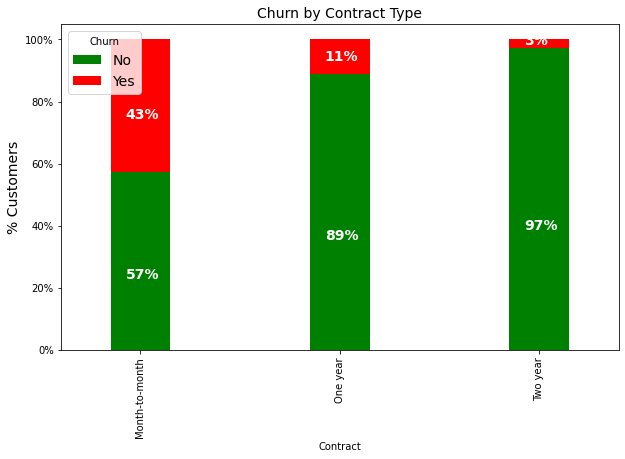

In [28]:
colors = ['green','red']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,
                                                              figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

About 43% of customer with Month-to-Month Contract decided to move out as compared to 11% of customrs with One Year Contract and 3% with Two Year Contract




Text(0.5, 1.0, 'Distribution of Churn Status')

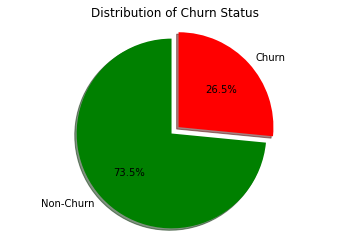

In [29]:
labels = ['Non-Churn', 'Churn']
sizes = df['Churn'].value_counts().values
colors = ['green', 'red']
explode = (0.1, 0)  # explode the "Non-Churn" slice slightly
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # ensure that the pie is drawn as a circle
plt.title('Distribution of Churn Status')



Text(0.5, 1.0, 'Distribution of Churn Status')

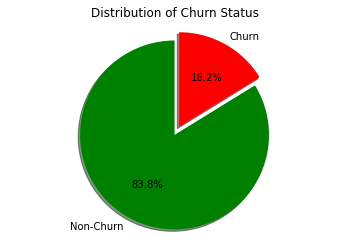

In [30]:
labels = ['Non-Churn', 'Churn']
sizes = df['SeniorCitizen'].value_counts().values
colors = ['green', 'red']
explode = (0.1, 0)  # explode the "Non-Churn" slice slightly
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # ensure that the pie is drawn as a circle
plt.title('Distribution of Churn Status')


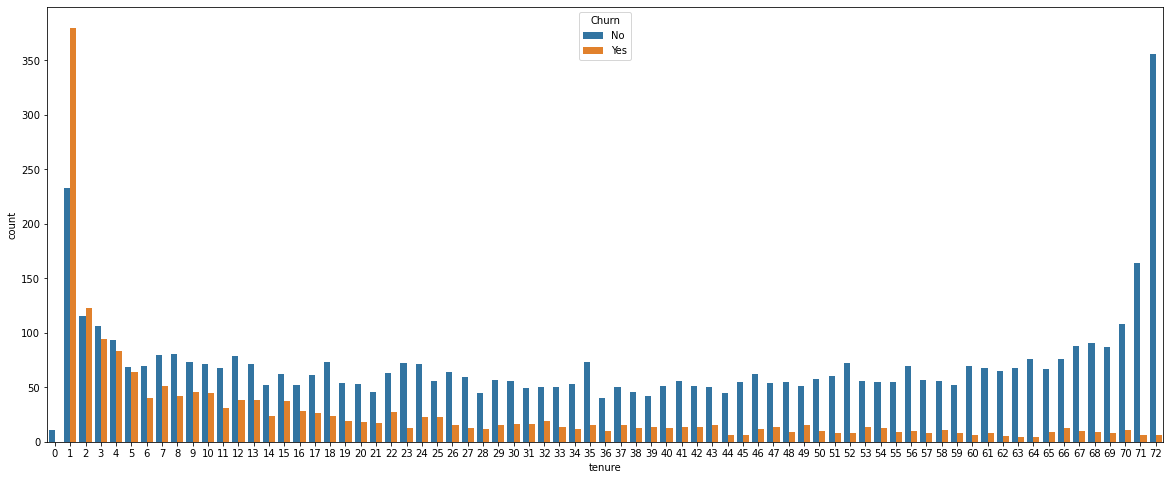

In [31]:
plt.figure(figsize=(20,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.

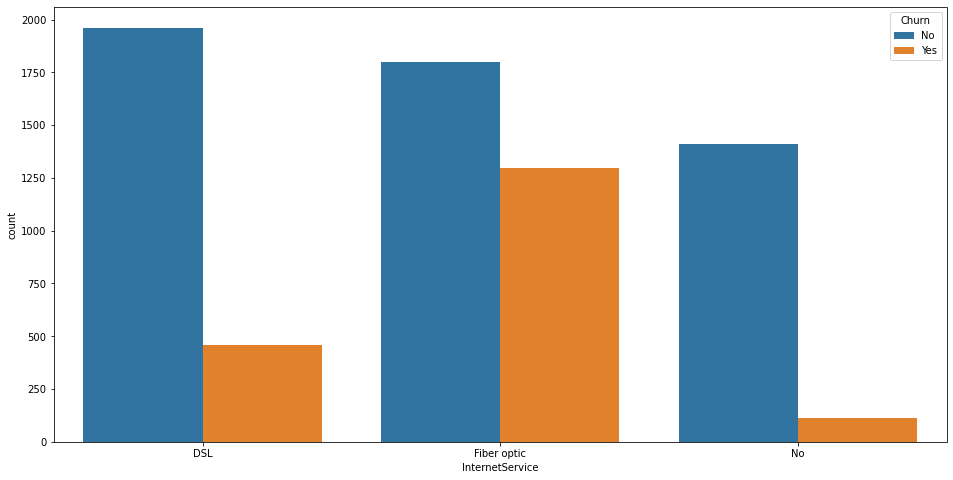

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.show()



* When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides highr speed compared to DSL. The reason might be the higher cost of fiber optics or the quality of the service it offers
* Even though the fibernet is faster people opt for the DSL which clearly means the service is not up to the mark
* If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service.

In [33]:
import numpy as np
import pandas as pd
import missingno as mn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [34]:
train_df= pd.read_csv('train.csv')
train_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [35]:
train_df.shape

(7043, 21)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [37]:
#provides summary statistics for numerical columns in the dataframe,
#it includes the count, mean, standard deviation, minimum and maximum values, and quartiles.
train_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [38]:
missing=train_df.isnull().sum()
missing


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
train_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<AxesSubplot:>

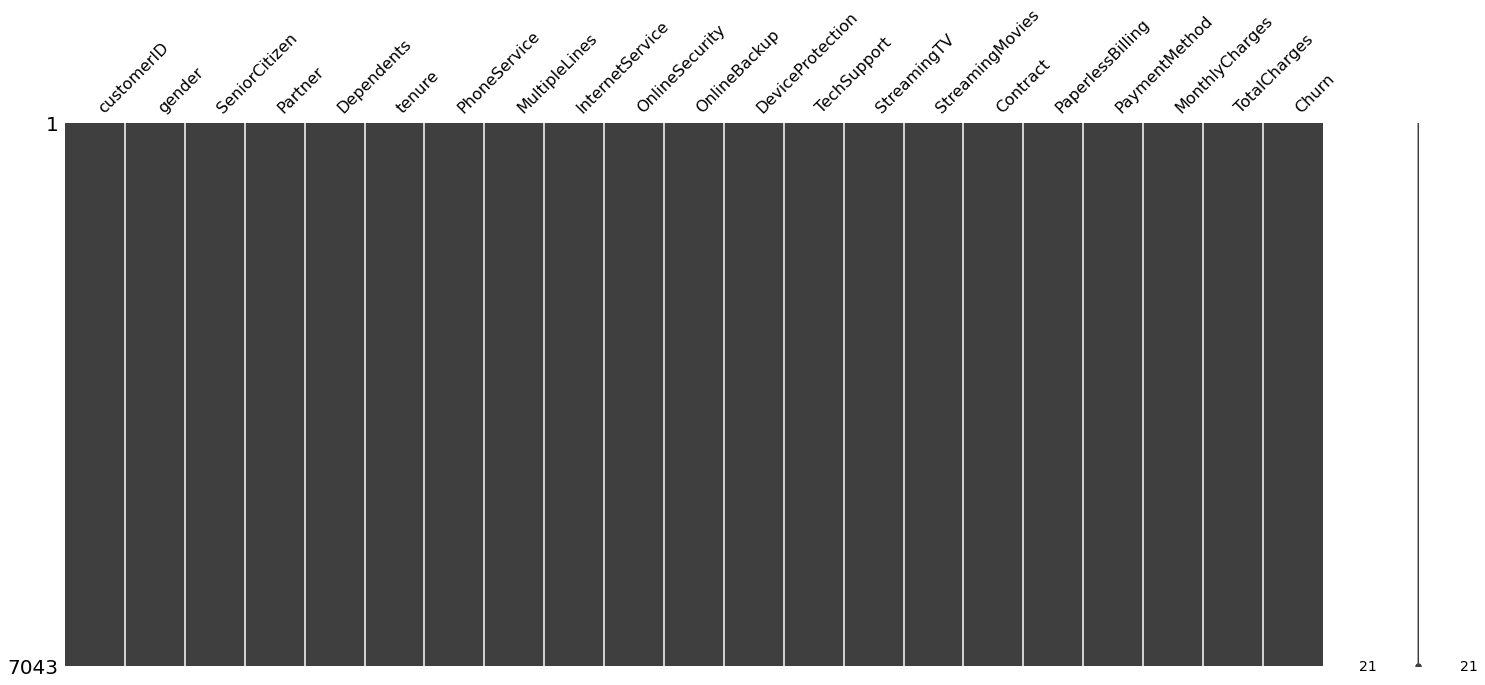

In [40]:
mn.matrix(train_df)

# Data Manipulation

In [41]:
# Convert TotalCharges to a numeric data type
train_df["TotalCharges"] = pd.to_numeric(train_df["TotalCharges"], errors="coerce")



In [42]:
missing=train_df.isnull().sum()
missing

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [43]:
# fill in missing values with the median value
median_value =train_df['TotalCharges'].median()
train_df['TotalCharges'].fillna(median_value, inplace=True)

In [44]:
missing=train_df.isnull().sum()
missing


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
train_df.drop('customerID', axis=1, inplace=True)


In [46]:
# Load the training data
train_df = pd.read_csv('train.csv')

In [47]:

# Remove customer IDs from the data set
df2 = train_df.iloc[:, 1:]


In [48]:
# Convert the predictor variable to binary numeric variable
label_encoder = LabelEncoder()
df2['Churn'] = label_encoder.fit_transform(df2['Churn'])



In [49]:
# Convert all categorical variables into label-encoded variables
for column in df2.columns:
    if df2[column].dtype == object:
        df2[column] = label_encoder.fit_transform(df2[column])

# Separate features and target variable
X = df2.drop(columns=['Churn'])
y = df2['Churn']



In [50]:
# Resample the data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution before and after resampling
print('Original class distribution:', y.value_counts())
print('Resampled class distribution:', y_resampled.value_counts())

Original class distribution: 0    5174
1    1869
Name: Churn, dtype: int64
Resampled class distribution: 0    5174
1    5174
Name: Churn, dtype: int64


In [51]:
# Scaling all the variables to a range of 0 to 1
features = X.columns.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_resampled)
X_train = pd.DataFrame(scaler.transform(X_resampled))
X_train.columns = features



In [52]:
# Running logistic regression model
model = LogisticRegression()
result = model.fit(X_train, y_resampled)



In [53]:
# Load the test data
test_df = pd.read_csv('test.csv')


In [54]:
# Convert all categorical variables into label-encoded variables
for column in test_df.columns:
    if test_df[column].dtype == object:
        test_df[column] = label_encoder.fit_transform(test_df[column])

# Scaling all the variables to a range of 0 to 1
X_test = pd.DataFrame(scaler.transform(test_df))

# Make predictions on the test data using the trained model
y_pred = model.predict(X_test)

# Print the predicted values
print(y_pred)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_resampled, model.predict(X_train))
print('The accuracy of the model is:', accuracy*100)

[0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0]
The accuracy of the model is: 81.15577889447236


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import warnings

# Define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]}

# Create a logistic regression model with lbfgs solver
model = LogisticRegression(solver='lbfgs', max_iter=10000)

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='f1_macro')


grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best model to make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 Score:', f1*100)


Best hyperparameters: {'C': 100, 'max_iter': 1000}
Accuracy: 81.59420289855073
Precision: 79.50530035335689
Recall: 85.79599618684462
F1 Score: 82.53094910591471


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

# Define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 500, 1000]}

# Create a logistic regression model with lbfgs solver
model = LogisticRegression(solver='lbfgs', max_iter=10000)

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)
# Fit the grid search object to the data
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    grid_search.fit(X_resampled, y_resampled)


# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best model to make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 Score:', f1*100)


Best hyperparameters: {'C': 1, 'max_iter': 500}
Accuracy: 81.83574879227054
Precision: 79.69991173874669
Recall: 86.08198284080076
F1 Score: 82.76810265811181


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import warnings

# Define the hyperparameters to tune
param_grid = {'max_depth': [1, 5, 10, None], 'min_samples_leaf': [1, 5, 10]}

# Create a decision tree model
model = DecisionTreeClassifier()

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object to the data
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Use the best model to make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the predicted values
print(y_pred)

print('Accuracy:', accuracy*100)
print('Precision:', precision*100)
print('Recall:', recall*100)
print('F1 Score:', f1*100)


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 10}
[1 0 0 ... 1 1 1]
Accuracy: 86.47342995169082
Precision: 85.37258509659613
Recall: 88.465204957102
F1 Score: 86.89138576779027


In [59]:
import pickle

# Save the best model as a pickle file
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)